In [1]:
# Bike LA


In [29]:
# Import Statements 

from pathlib import Path

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [30]:
# Configs 

DATA_DIR = Path('/home/jentlejames/Datasets/BikeLA')
PROJECT_DIR = Path('/home/jentlejames/Projects/Data/Data Analysis Projects/BikeLA')

In [31]:
# Loading Data

train = pd.read_csv(DATA_DIR/'train_set.csv')
test = pd.read_csv(DATA_DIR/'test_set.csv')
print(test.shape)
print(train.shape)

/tmp/ipykernel_96199/3422107932.py:3: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv(DATA_DIR/'train_set.csv')


(569886, 12)
(700000, 14)


/tmp/ipykernel_96199/3422107932.py:4: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  test = pd.read_csv(DATA_DIR/'test_set.csv')


In [32]:
# Inspecting the Data

train.sample(3)

,trip_id,duration,start_time,end_time,start_lat,start_lon,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,start_station,end_station
619985,162113898,24,5/31/2021 12:58,5/31/2021 13:22,34.094372,-118.331009,34.082649,-118.284393,5741,365.0,One Way,Annual Pass,4482,4453
562726,147882434,6,9/23/2020 7:51,9/23/2020 7:57,34.049301,-118.238808,34.049980,-118.247162,5914,30.0,One Way,Monthly Pass,3042,3027
261191,163256212,12,6/11/2021 18:27,6/11/2021 18:39,34.101639,-118.309174,34.094372,-118.331009,5963,30.0,One Way,Monthly Pass,4509,4482


In [33]:
# Checking Datatypes

In [34]:
train.dtypes

trip_id                  int64
duration                 int64
start_time              object
end_time                object
start_lat              float64
start_lon              float64
end_lat                float64
end_lon                float64
bike_id                 object
plan_duration          float64
trip_route_category     object
passholder_type         object
start_station            int64
end_station              int64
dtype: object

In [35]:
# Converting to Datetime

train['start_time'] = pd.to_datetime(train.start_time)
train['end_time'] = pd.to_datetime(train.end_time)

test['start_time'] = pd.to_datetime(test.start_time)
test['end_time'] = pd.to_datetime(test.end_time)

In [36]:
train['start_time'].last()

TypeError: NDFrame.last() missing 1 required positional argument: 'offset'

### Preprocessing Data

Step 1: Understanding and Encoding Categorical Variables 

#### Bike ID

This contains some messy data, that is not an integer, 
cleaning up and inspecting

In [ ]:
NumberOfUniqueBikeIDsTrain = len(train['bike_id'].unique())
NumberOfUniqueBikeIDsTest = len(test['bike_id'].unique())

print(f'Number of Unique Bike IDs in Training Set: {NumberOfUniqueBikeIDsTrain}')
print(f'Number of Unique Bike IDs in Test Set: {NumberOfUniqueBikeIDsTest}')

Number of Unique Bike IDs in Training Set: 7563
Number of Unique Bike IDs in Test Set: 6893


In [ ]:
train['bike_id'].describe()

count     700000
unique      7563
top        19544
freq        1183
Name: bike_id, dtype: object

In [ ]:
badBikeIDsTest = test[test['bike_id'].str.isnumeric() == False].index
badBikeIDsTrain =  train[train['bike_id'].str.isnumeric() == False].index


In [ ]:
test.drop(badBikeIDsTest,inplace=True)
train.drop(badBikeIDsTrain,inplace=True)

<AxesSubplot:>

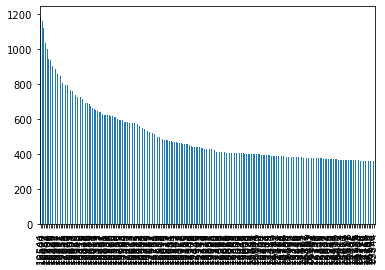

In [ ]:
train['bike_id'].value_counts()[0:200].plot(kind='bar')
plt.axe

This shows that there is a strong skew to the bike data, were some bikes get used much more often than others

In [ ]:
train.bike_id.value_counts().median()

45.0

In [ ]:
train.bike_id.value_counts().mean()

92.63935944944416

#### Trip Route Category and Passholder Type

56% of all trips are done by passholders

In [ ]:
train['passholder_type'].value_counts()

Monthly Pass    394763
Walk-up         212424
One Day Pass     44452
Annual Pass      34086
Flex Pass        11604
Testing             78
Name: passholder_type, dtype: int64

In [ ]:

print( f"Percentage of Trips by monthly passholders: {train['passholder_type'].value_counts()[0] / train.shape[0]}")

Percentage of Trips by monthly passholders: 0.5639608390489483


In [ ]:
train['trip_route_category'].value_counts()

One Way       582073
Round Trip    117910
Name: trip_route_category, dtype: int64

## GPS

Determining the Grids to be used

In [ ]:
# He

In [ ]:
train['end_lat'] = train['end_lat'].abs()
train['end_lon'] = train['end_lon'].abs()
train['start_lat'] = train['start_lat'].abs()
train['start_lon'] = train['start_lon'].abs()

test['end_lat'] = test['end_lat'].abs()
test['end_lon'] = test['end_lon'].abs()
test['start_lat'] = test['start_lat'].abs()
test['start_lon'] = test['start_lon'].abs()

In [22]:
highestLatitude = train['end_lat'].max()
lowestLatitude =  train['end_lat'].min()

In [28]:
train['start_lat'].max()
# Why is the GPS in Moscow?
# User Used  a VPN? 



55.705528

This shows that it is necessary to clip out the data based on the gps locations in LA county

In [39]:
# GPS Box

# Highest
limitNorth = 34.2 # Grapevine
limitSouth = 33.42 # Korean War Memorial / Port of LA
limitEast = 117.40 # Mt Baldy
limitWest = 118.48 # Malibu Point Dume


In [59]:
# Finding outliars 
outOfBoundsLatTest =  test[~(limitSouth <  test['start_lat'] ) & (limitNorth > test['start_lat']) ].index
outOfBoundsLonTest = test[(limitEast <  test['start_lon'] ) & (limitWest > test['start_lon']) ].index#< limitNorth ]

test.drop(outOfBoundsLonTest,inplace=True)
test.drop(outOfBoundsLatTest,inplace=True)



In [60]:

outOfBoundsLatTrain =  train[~(limitSouth <  train['start_lat'] ) & (limitNorth > train['start_lat']) ].index
outOfBoundsLonTrain = train[(limitEast <  train['start_lon'] ) & (limitWest > train['start_lon']) ].index

train.drop(outOfBoundsLatTrain,inplace=True )
train.drop(outOfBoundsLonTrain,inplace=True)

##< limitNorth ]

In [ ]:
#  Python Openign GeoJSON
